Week 4 Module 

Lilly Gordon

In [1]:
import tifffile as tif
import rasterio
import rasterio.plot
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Change the path to your data directory
raster_path = r"C:\Users\lilli\OneDrive\Desktop\GEO6835\GEOG6835\Week 4\dem_90m.tif"

# Using tifffile library
raster_tif = tif.imread(raster_path) #gives you raw pixel values as a NumPy array, but no metadata

print(raster_tif)

#Using rasterio
src = rasterio.open(raster_path) #gives you a dataset object (src) with both pixel values and metadata
print(src)

[[ 579  582  591 ... 2014 2029 2040]
 [ 595  603  613 ... 1986 1995 2010]
 [ 609  622  628 ... 1964 1987 2011]
 ...
 [ 544  541  569 ...  451  446  440]
 [ 530  532  566 ...  455  446  437]
 [ 520  519  544 ...  447  450  447]]
<open DatasetReader name='C:\Users\lilli\OneDrive\Desktop\GEO6835\GEOG6835\Week 4\dem_90m.tif' mode='r'>


In [4]:
# Basic file information
print(f"File name: {src.name}") # shows the file path
print(f"File mode: {src.mode}") # how the file was opened (r = read, w = write)

print("Raster metadata:")
for key, value in src.meta.items():
  print(f"{key}: {value}")

File name: C:\Users\lilli\OneDrive\Desktop\GEO6835\GEOG6835\Week 4\dem_90m.tif
File mode: r
Raster metadata:
driver: GTiff
dtype: int16
nodata: None
width: 4269
height: 3113
count: 1
crs: EPSG:3857
transform: | 90.00, 0.00,-13442488.34|
| 0.00,-90.00, 4668371.58|
| 0.00, 0.00, 1.00|


In [8]:
#Coordinate Reference System (CRS)
print(f"Coordinate Reference System: {src.crs}")

#Spatial resoulution (pixel size)
print(f"Pixel size (x,y): {src.res}")

#Raster dimensions
print(f"Raster dimensions: {src.width} x {src.height} pixels")

#Geographic Extent
print(f"Geographic bounds: {src.bounds}")


Coordinate Reference System: EPSG:3857
Pixel size (x,y): (90.0, 89.99579177642138)
Raster dimensions: 4269 x 3113 pixels
Geographic bounds: BoundingBox(left=-13442488.3428, bottom=4388214.6777, right=-13058278.3428, top=4668371.5775)


In [10]:
#Data Properties
print(f"Data types: {src.dtypes}")

#Number of bands
print(f"Number of bands: {src.count}")

Data types: ('int16',)
Number of bands: 1


1.2 Visualizing Raster Data

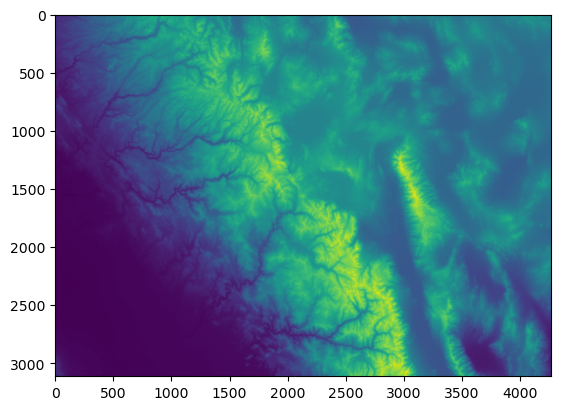

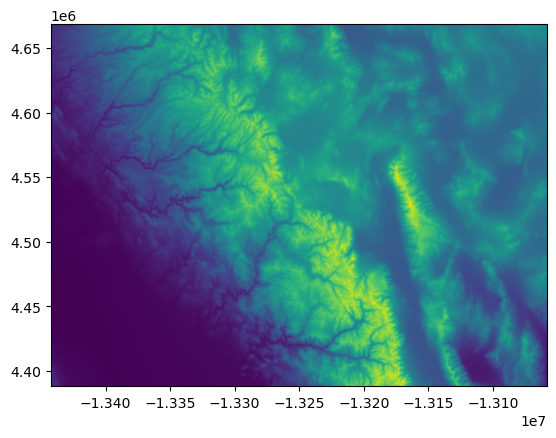

<Axes: >

In [ ]:
#Vizualizing Single Band

#plot raster_tif read using tif.imread()
plt.imshow(raster_tif)
plt.show() #displays the tifffle image which is NOT georeferenced, just an array of pixel values

#plot src through rasterio
rasterio.plot.show(src) #displays the rasterio image which is georeferenced, and knows how to handle band scaling

Number of bands: 7


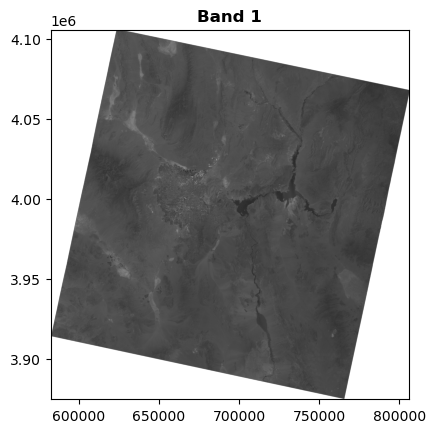

<Axes: title={'center': 'Band 1'}>

In [20]:
#Visualizng Multi-band rasters

raster_path = r"C:\Users\lilli\OneDrive\Desktop\GEO6835\GEOG6835\Week 4\LC09_039035_20240708_90m.tif"
src = rasterio.open(raster_path) #opened the file with rasterio so it is georeferenced
print(f"Number of bands: {src.count}") #prints the number of bands in the raster

#Single band visualization from the source, choose Band 1
rasterio.plot.show((src, 1), cmap="grey", title="Band 1")  #cmap - color map specfication. we are providing grayscale as our final map color

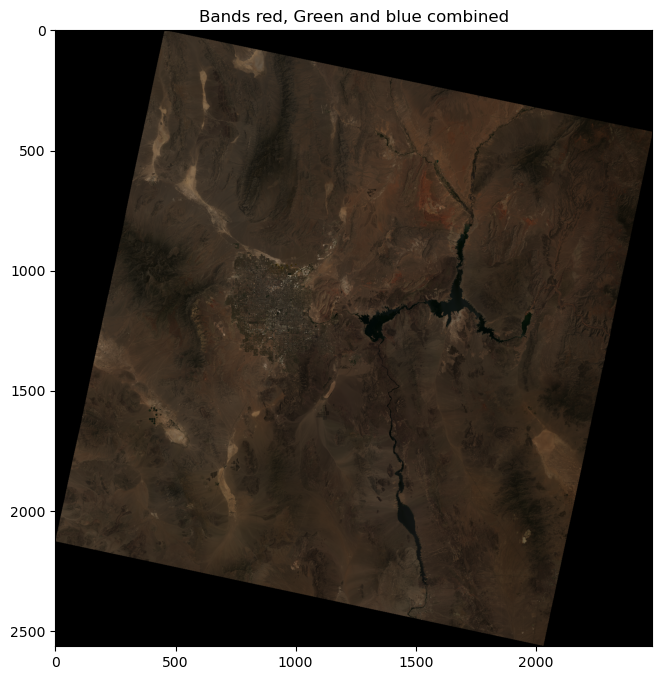

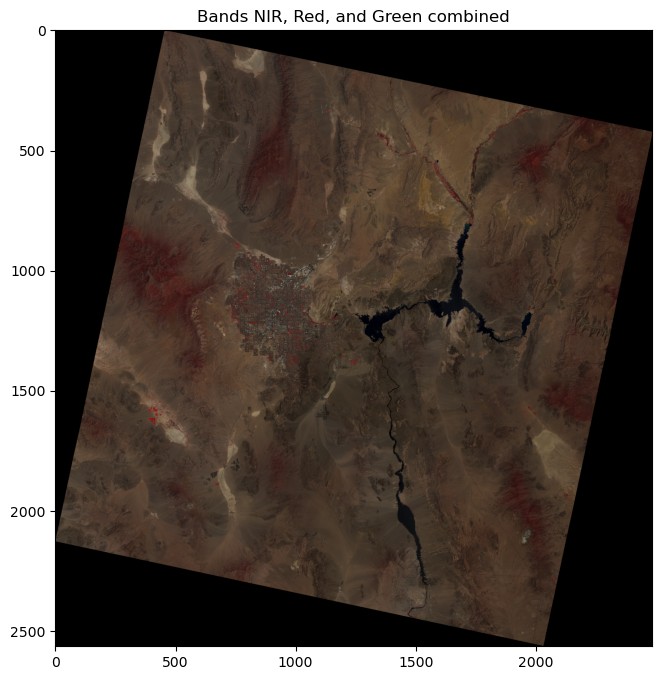

In [26]:
#RGB Composites

#src.read gets our data into an numpy array. numpy arrays have various plotting functions that can be employed:
# naming each band for ease of use later
nir_band = src.read(5)
red_band = src.read(4)
green_band = src.read(3)
blue_band = src.read(2)

# RBG - Stack the bands into a single array
rgb = np.dstack((red_band, green_band,  blue_band)).clip(0, 1) # We need to clip the values to be within the 0-1 range for proper display
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb)
plt.title("Bands red, Green and blue combined")
plt.show()

# False Color - Stack the bands into a single array
fcc = np.dstack((nir_band, red_band, green_band)).clip(0, 1)
# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(fcc)
plt.title("Bands NIR, Red, and Green combined")
plt.show()

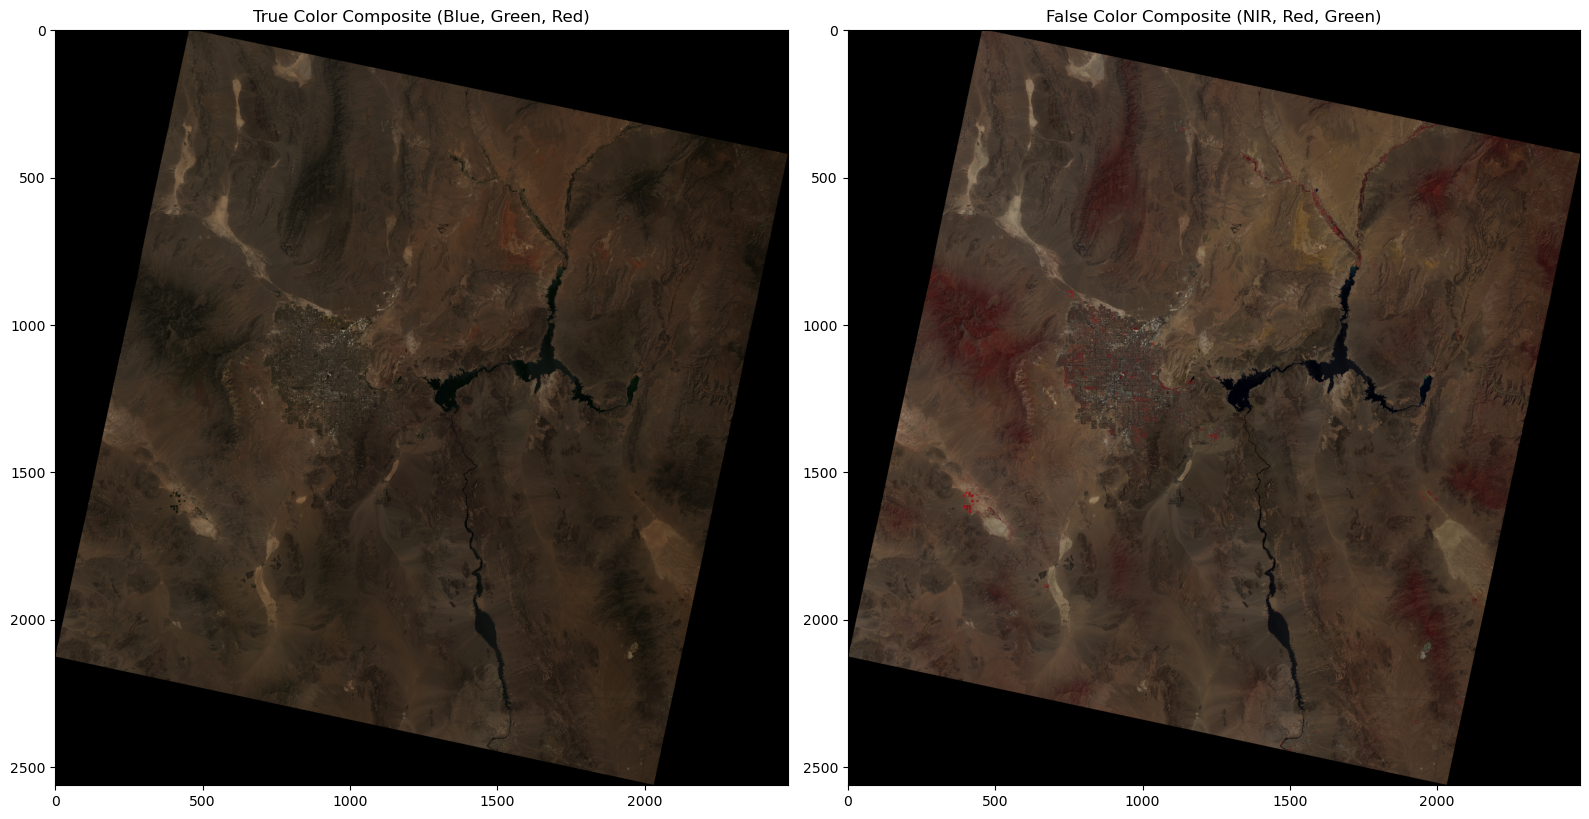

In [27]:
#Plot True and False Color as subplots within a single figure
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Plot RGB composite
axes[0].imshow(rgb)
axes[0].set_title("True Color Composite (Blue, Green, Red)")

# Plot False Color Composite
axes[1].imshow(fcc)
axes[1].set_title("False Color Composite (NIR, Red, Green)")

plt.tight_layout()
plt.show()

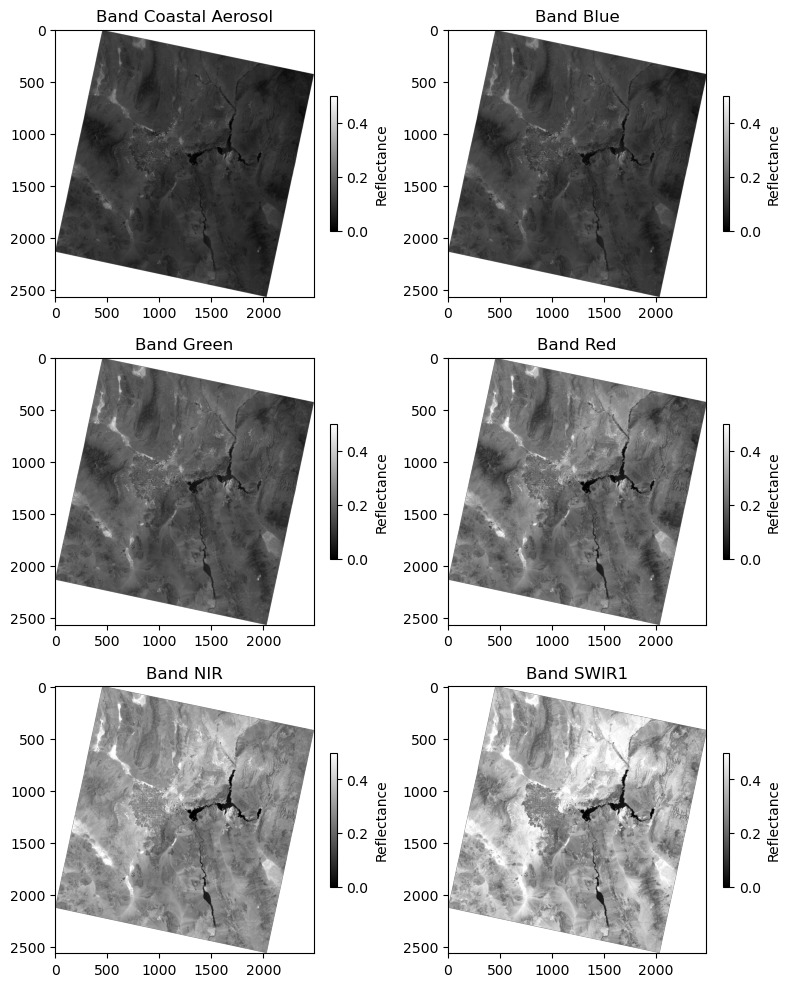

In [28]:
#Multi-panel plot of 6 bands in the raster in one function

band_names = ["Coastal Aerosol", "Blue", "Green", "Red", "NIR", "SWIR1", "SWIR2"]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
axes = axes.flatten() # Flatten the 2D array of axes to 1D for easy iteration

for band in range(1, src.count):
  data = src.read(band)
  ax = axes[band - 1]
  im = ax.imshow(data, cmap="gray", vmin=0, vmax=0.5)
  ax.set_title(f"Band {band_names[band - 1]}") #Iterating through the band names to automatically get the title
  fig.colorbar(im, ax=ax, label="Reflectance", shrink=0.5)

plt.tight_layout()
plt.show()

1.2.3 Plot the Raster array from tiffile

Text(0.5, 1.0, 'Single Band Raster (tifffile)')

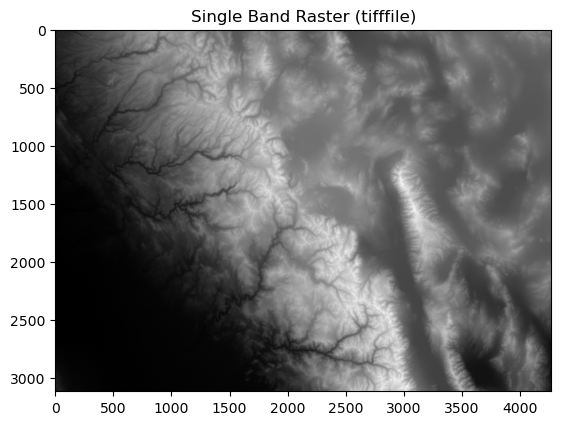

In [29]:
#Raster_tif is our DEM data
plt.imshow(raster_tif, cmap='gray') # Using 'gray' colormap for single band data
plt.title("Single Band Raster (tifffile)")

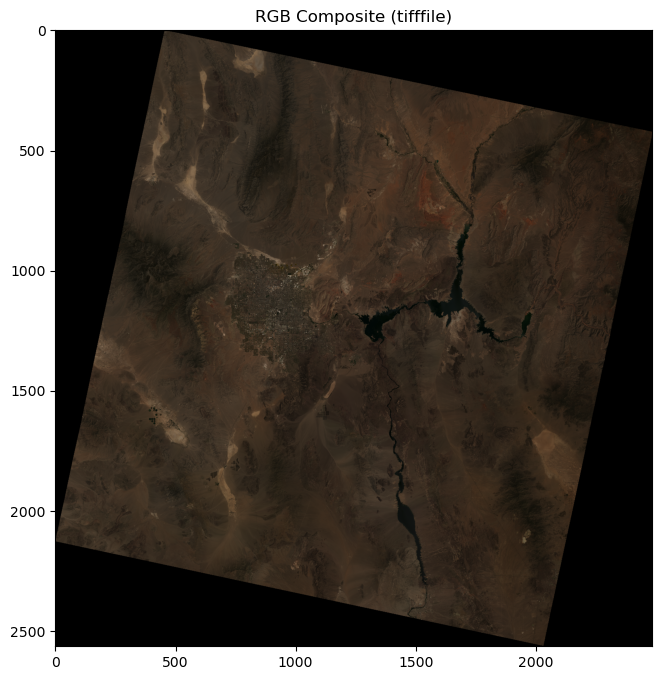

In [ ]:
# Read in the tif file using tifffile
# Raster_tif is our Landsat 9 multi-band dataset array
raster_path = r"C:\Users\lilli\OneDrive\Desktop\GEO6835\GEOG6835\Week 4\LC09_039035_20240708_90m.tif"
raster_tif = tif.imread(raster_path)

# Numpy array indexing starts from 0. Hence the values for RGB when read as a multi-band numpy array differs from the values used in rasterio
# Assuming bands 3, 2, and 1 are Red, Green, and Blue respectively (adjust based on actual band order)
# tifffile reads as zero-based index, so we will use indices 3, 2, and 1 for bands 4, 3, and 2
red_band_tif = raster_tif[:, :, 3]
green_band_tif = raster_tif[:, :, 2]
blue_band_tif = raster_tif[:, :, 1]

# Stack the bands into a single array for RGB display
# We need to clip the values to be within the 0-1 range for proper display
rgb_tif = np.dstack((red_band_tif, green_band_tif, blue_band_tif)).clip(0, 1) #Need to specify as bands in Red channel, Green channel and Blue channel.

# Plot the stacked array
plt.figure(figsize=(8, 8))
plt.imshow(rgb_tif)
plt.title("RGB Composite (tifffile)")
plt.show()

1.3 Writing Raster Data

In [36]:
#Once you have processed the raster data, you can turn it back into a GeoTIFF using rasterio

#First, review and update the metadata for the output file
with rasterio.open(raster_path) as src:
  profile = src.profile
  print(profile)

# If your processed dataset has a single band,

profile.update(dtype=rasterio.float32, count=3, compress="lzw")
print(profile)

# Finally, we write the processed data to a new file

output_raster_path = r"C:\Users\lilli\OneDrive\Desktop\GEO6835\GEOG6835\Week 4\processed.tif"
with rasterio.open(output_raster_path, "w", **profile) as dst:
  dst.write(fcc, 3)
  print(f"Raster data has been written to {output_raster_path}")


{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 7, 'crs': CRS.from_wkt('PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]'), 'transform': Affine(90.0, 0.0, 582390.0,
       0.0, -90.0, 4105620.0), 'blockxsize': 512, 'blockysize': 512, 'tiled': True, 'compress': 'deflate', 'interleave': 'pixel'}
{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -inf, 'width': 2485, 'height': 2563, 'count': 3, 'crs': 

ValueError: Source shape (1, 2563, 2485, 3) is inconsistent with given indexes 1